In [22]:
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
from matplotlib import pyplot as plt

In [23]:
chroma_client = chromadb.PersistentClient(path="vectordb")

In [24]:
# Instantiate image loader helper.
image_loader = ImageLoader()

# Instantiate multimodal embedding function.
multimodal_ef = OpenCLIPEmbeddingFunction()

In [25]:
multimodal_db = chroma_client.get_or_create_collection(name="multimodal_db", embedding_function=multimodal_ef,
                                                       data_loader=image_loader)

In [26]:
#Example
# multimodal_db.add(
#     ids=['0', '1'],
#     uris=['images/lion.jpg', 'images/tiger.jpg'],
#     metadatas=[{'img_category': 'animals'}, {'img_category': 'animals'}]
# )
# delete the collection
# chroma_client.delete_collection("multimodal_db")

In [27]:
import os


def get_img_files():
    img_files = []
    for file in os.listdir("Brand2"):
        if file.endswith(".jpg"):
            img_files.append(file)
    return img_files


len(get_img_files()), get_img_files()

(5455,
 ['06J-0084-CUERO (1).jpg',
  '06J-0084-CUERO (2).jpg',
  '06J-0084-CUERO (3).jpg',
  '06J-0084-CUERO (4).jpg',
  '06J-0098-BLACK (1).jpg',
  '06J-0098-BLACK (2).jpg',
  '06J-0098-BLACK (3).jpg',
  '06J-0098-BLACK (4).jpg',
  '06J-0098-BLUE (1).jpg',
  '06J-0098-BLUE (2).jpg',
  '06J-0098-BLUE (3).jpg',
  '06J-0098-BLUE (4).jpg',
  '06J-0098-CUERO (1).jpg',
  '06J-0098-CUERO (2).jpg',
  '06J-0098-CUERO (3).jpg',
  '06J-0098-CUERO (4).jpg',
  '06J-5433-CUERO (1).jpg',
  '06J-5433-CUERO (2).jpg',
  '06J-5433-CUERO (3).jpg',
  '06J-5433-CUERO (4).jpg',
  '06J-5433C1-BLUE (1).jpg',
  '06J-5433C1-BLUE (2).jpg',
  '06J-5433C1-BLUE (3).jpg',
  '06J-5433C1-BLUE (4).jpg',
  '06J-5433C1-CASTOR (1).jpg',
  '06J-5433C1-CASTOR (2).jpg',
  '06J-5433C1-CASTOR (3).jpg',
  '06J-5433C1-CASTOR (4).jpg',
  '06J-5433C1-HONEY (1).jpg',
  '06J-5433C1-HONEY (2).jpg',
  '06J-5433C1-HONEY (3).jpg',
  '06J-5433C1-HONEY (4).jpg',
  '06J-5433C1-PICKLE (1).jpg',
  '06J-5433C1-PICKLE (2).jpg',
  '06J-5433C1-P

In [28]:
import re
for i, img_file in enumerate(get_img_files()):
    img_id = str(i+352)
    metadata_match = re.match(r'(.+?)(\(\d+\))?\.(\w+)', img_file)
    if metadata_match:
        metadata = metadata_match.group(1).replace(" ", "")
    else:
        metadata = img_file.split(".")[0].replace(" ", "")
    img_uri = f"Brand2/{img_file}"
    img_metadata = {"filename": metadata}
    print(img_id, metadata)
    multimodal_db.update(ids=[img_id], uris=[img_uri], metadatas=[img_metadata])

352 06J-0084-CUERO
353 06J-0084-CUERO
354 06J-0084-CUERO
355 06J-0084-CUERO
356 06J-0098-BLACK
357 06J-0098-BLACK
358 06J-0098-BLACK
359 06J-0098-BLACK
360 06J-0098-BLUE
361 06J-0098-BLUE
362 06J-0098-BLUE
363 06J-0098-BLUE
364 06J-0098-CUERO
365 06J-0098-CUERO
366 06J-0098-CUERO
367 06J-0098-CUERO
368 06J-5433-CUERO
369 06J-5433-CUERO
370 06J-5433-CUERO
371 06J-5433-CUERO
372 06J-5433C1-BLUE
373 06J-5433C1-BLUE
374 06J-5433C1-BLUE
375 06J-5433C1-BLUE
376 06J-5433C1-CASTOR
377 06J-5433C1-CASTOR
378 06J-5433C1-CASTOR
379 06J-5433C1-CASTOR
380 06J-5433C1-HONEY
381 06J-5433C1-HONEY
382 06J-5433C1-HONEY
383 06J-5433C1-HONEY
384 06J-5433C1-PICKLE
385 06J-5433C1-PICKLE
386 06J-5433C1-PICKLE
387 06J-5433C1-PICKLE
388 06J-5818-BLACK
389 06J-5818-BLACK
390 06J-5818-BLACK
391 06J-5818-BLACK
392 06J-5818-BLUE
393 06J-5818-BLUE
394 06J-5818-BLUE
395 06J-5818-BLUE
396 06J-5818-BRANDY
397 06J-5818-BRANDY
398 06J-5818-BRANDY
399 06J-5818-BRANDY
400 06J-5818-CUERO
401 06J-5818-CUERO
402 06J-5818-CUERO

5456 WHA-1093-NECTAR
5457 WHA-1093-NECTAR
5458 WHA-1093-NECTAR
5459 WHA-1093-NECTAR
5460 WHA-1093-OCEAN
5461 WHA-1093-OCEAN
5462 WHA-1093-OCEAN
5463 WHA-1093-OCEAN
5464 WHA-1098-DENIM
5465 WHA-1098-DENIM
5466 WHA-1098-DENIM
5467 WHA-1098-DENIM
5468 WHA-1098-MARFIL
5469 WHA-1098-MARFIL
5470 WHA-1098-MARFIL
5471 WHA-1098-MARFIL
5472 WHA-1098-NECTAR
5473 WHA-1098-NECTAR
5474 WHA-1098-NECTAR
5475 WHA-1098-NECTAR
5476 WHA-1100-BRANDY
5477 WHA-1100-BRANDY
5478 WHA-1100-BRANDY
5479 WHA-1100-BRANDY
5480 WHA-1100-MARFIL


5481 WHA-1100-MARFIL
5482 WHA-1100-MARFIL
5483 WHA-1100-MARFIL
5484 WHA-1104-DENIM
5485 WHA-1104-DENIM
5486 WHA-1104-DENIM
5487 WHA-1104-DENIM
5488 WHA-1104-MARFIL
5489 WHA-1104-MARFIL
5490 WHA-1104-MARFIL
5491 WHA-1104-MARFIL
5492 WHA-1104-NECTAR
5493 WHA-1104-NECTAR
5494 WHA-1104-NECTAR
5495 WHA-1104-NECTAR
5496 WHA-1105-BLACK
5497 WHA-1105-CAMEL
5498 WHA-1105-CAMEL
5499 WHA-1105-CAMEL
5500 WHA-1105-CAMEL
5501 WHA-1105-DENIM
5502 WHA-1105-DENIM
5503 WHA-1105-DENIM


5504 WHA-1105-DENIM
5505 WHA-181-ACAI
5506 WHA-181-ACAI
5507 WHA-181-ACAI
5508 WHA-181-ACAI
5509 WHA-181-ALMOND
5510 WHA-181-ALMOND
5511 WHA-181-ALMOND
5512 WHA-181-ALMOND
5513 WHA-181-BROWN
5514 WHA-181-BROWN
5515 WHA-181-BROWN
5516 WHA-181-BROWN
5517 WHA-181-COGNAC
5518 WHA-181-COGNAC
5519 WHA-181-COGNAC
5520 WHA-181-COGNAC
5521 WHA-181-GARNET
5522 WHA-181-GARNET
5523 WHA-181-GARNET
5524 WHA-181-GARNET
5525 WHA-181-MINTGREEN
5526 WHA-181-MINTGREEN
5527 WHA-181-MINTGREEN
5528 WHA-181-MINTGREEN
5529 WHA-181-MOSTAZA


5530 WHA-181-MOSTAZA
5531 WHA-181-MOSTAZA
5532 WHA-181-MOSTAZA
5533 WHA-181-NAVYBLUE
5534 WHA-181-NAVYBLUE
5535 WHA-181-NAVYBLUE
5536 WHA-181-NAVYBLUE
5537 WHA-181-NECTAR
5538 WHA-181-NECTAR
5539 WHA-181-NECTAR
5540 WHA-181-NECTAR
5541 WHA-181-OLIVE
5542 WHA-181-OLIVE
5543 WHA-181-OLIVE
5544 WHA-181-OLIVE
5545 WHA-181-RED
5546 WHA-181-RED
5547 WHA-181-RED
5548 WHA-181-RED
5549 WHA-181-SAPPHIRE
5550 WHA-181-SAPPHIRE
5551 WHA-181-SAPPHIRE
5552 WHA-181-SAPPHIRE


5553 WHA-181-SOL
5554 WHA-181-SOL
5555 WHA-181-SOL
5556 WHA-181-SOL
5557 WHA-181-TAN
5558 WHA-181-TAN
5559 WHA-181-TAN
5560 WHA-181-TAN
5561 WHA-233-NATA-CREAM
5562 WHA-233-NATA-CREAM
5563 WHA-233-NATA-CREAM
5564 WHA-233-NATA-CREAM
5565 WHA-233-NATA-CREAM
5566 WHA-234-BAMBOO
5567 WHA-234-BAMBOO
5568 WHA-234-BAMBOO


5569 WHA-234-BAMBOO
5570 WHA-234-HONEY
5571 WHA-234-HONEY
5572 WHA-234-HONEY
5573 WHA-234-HONEY
5574 WHA-234-OCEAN
5575 WHA-234-OCEAN
5576 WHA-234-OCEAN
5577 WHA-234-OCEAN
5578 WHA-339C1-MARFIL
5579 WHA-339C1-MARFIL
5580 WHA-339C1-MARFIL
5581 WHA-339C1-MARFIL
5582 WHA-339C1-MARFIL
5583 WHA-339C1-NECTAR
5584 WHA-339C1-NECTAR
5585 WHA-339C1-NECTAR
5586 WHA-339C1-NECTAR
5587 WHA-339C1-SAND
5588 WHA-339C1-SAND
5589 WHA-339C1-SAND
5590 WHA-339C1-SAND


5591 WHA-340-BRANDY
5592 WHA-340-BRANDY
5593 WHA-340-BRANDY
5594 WHA-340-BRANDY
5595 WHA-340-MARFIL
5596 WHA-340-MARFIL
5597 WHA-340-MARFIL
5598 WHA-340-MARFIL
5599 WHA-340-MINTGREEN
5600 WHA-340-MINTGREEN
5601 WHA-340-MINTGREEN
5602 WHA-340-MINTGREEN
5603 WHA-340-NECTAR
5604 WHA-340-NECTAR
5605 WHA-340-NECTAR
5606 WHA-340-NECTAR
5607 WHA-340-NECTAR
5608 WHA-346-MARFIL
5609 WHA-346-MARFIL
5610 WHA-346-MARFIL


5611 WHA-346-MARFIL
5612 WHA-347-BRANDY
5613 WHA-347-BRANDY
5614 WHA-347-BRANDY
5615 WHA-347-BRANDY
5616 WHA-347-BRANDY
5617 WHA-348-BRANDY
5618 WHA-348-BRANDY
5619 WHA-348-BRANDY
5620 WHA-348-BRANDY
5621 WHA-349-BLACK
5622 WHA-349-BLACK
5623 WHA-349-BLACK
5624 WHA-349-BLACK
5625 WHA-349-MARFIL
5626 WHA-349-MARFIL
5627 WHA-349-MARFIL
5628 WHA-349-MARFIL
5629 WHA-350-COGNAC
5630 WHA-350-COGNAC
5631 WHA-350-COGNAC


5632 WHA-350-COGNAC
5633 WHA-350-COGNAC
5634 WHA-350-ORANGE
5635 WHA-350-ORANGE
5636 WHA-350-ORANGE
5637 WHA-350-ORANGE
5638 WHA-350-RIVER
5639 WHA-350-RIVER
5640 WHA-350-RIVER
5641 WHA-350-RIVER
5642 WHA-355-BRANDY
5643 WHA-355-BRANDY
5644 WHA-355-BRANDY
5645 WHA-355-BRANDY
5646 WHA-355-NATA
5647 WHA-355-NATA
5648 WHA-355-NATA
5649 WHA-355-NATA
5650 WHA-356-TAN
5651 WHA-356-TAN


5652 WHA-356-TAN
5653 WHA-356-TAN
5654 WHA-368-MARFIL
5655 WHA-368-MARFIL
5656 WHA-368-MARFIL
5657 WHA-368-MARFIL
5658 WHA-369-BRANDY
5659 WHA-369-BRANDY
5660 WHA-369-BRANDY
5661 WHA-369-BRANDY
5662 WHA-369-MARFIL
5663 WHA-369-MARFIL
5664 WHA-369-MARFIL
5665 WHA-369-MARFIL
5666 WHA-371-BLACK
5667 WHA-371-BLACK
5668 WHA-371-BLACK
5669 WHA-371-BLACK
5670 WHA-371-BRANDY
5671 WHA-371-BRANDY
5672 WHA-371-BRANDY


5673 WHA-371-BRANDY
5674 WHA-422-BLACK
5675 WHA-422-BLACK
5676 WHA-422-BLACK
5677 WHA-422-BLACK
5678 WHA-422-BRANDY
5679 WHA-423-BAMBOO
5680 WHA-423-DENIM
5681 WHA-424-BRANDY
5682 WHA-424-BRANDY
5683 WHA-424-BRANDY
5684 WHA-424-BRANDY
5685 WHA-531-BLACK
5686 WHA-531-BLACK
5687 WHA-531-BLACK
5688 WHA-531-BLACK
5689 WHA-531-BRANDY
5690 WHA-531-BRANDY
5691 WHA-531-BRANDY
5692 WHA-531-BRANDY
5693 WHA-531-MARFIL
5694 WHA-531-MARFIL


5695 WHA-531-MARFIL
5696 WHA-531-MARFIL
5697 WHA-532-COGNAC
5698 WHA-532-COGNAC
5699 WHA-532-COGNAC
5700 WHA-532-COGNAC
5701 WHA-532-COGNAC
5702 WHA-532-ORANGE
5703 WHA-532-ORANGE
5704 WHA-532-ORANGE
5705 WHA-532-ORANGE
5706 WHA-532-RIVER
5707 WHA-532-RIVER
5708 WHA-532-RIVER
5709 WHA-532-RIVER
5710 WHA-533-BLACK
5711 WHA-533-BLACK
5712 WHA-533-BLACK
5713 WHA-533-BLACK
5714 WHA-653-CREAM
5715 WHA-653-CREAM
5716 WHA-653-CREAM
5717 WHA-653-CREAM
5718 WHA-653-CREAM
5719 WHA-653-MALVA


5720 WHA-653-MALVA
5721 WHA-653-MALVA
5722 WHA-653-MALVA
5723 WHA-653-MELOCOTON
5724 WHA-653-MELOCOTON
5725 WHA-653-MELOCOTON
5726 WHA-653-MELOCOTON
5727 WHA-654-BRANDY
5728 WHA-654-BRANDY
5729 WHA-654-BRANDY
5730 WHA-654-BRANDY
5731 WHA-726-ACAI
5732 WHA-726-ACAI
5733 WHA-726-ACAI
5734 WHA-726-ACAI
5735 WHA-726-COGNAC
5736 WHA-726-COGNAC
5737 WHA-726-COGNAC
5738 WHA-726-COGNAC
5739 WHA-726-MOSTAZA
5740 WHA-726-MOSTAZA
5741 WHA-726-MOSTAZA
5742 WHA-726-MOSTAZA


5743 WHA-726-NAVYBLUE
5744 WHA-726-NAVYBLUE
5745 WHA-726-NAVYBLUE
5746 WHA-726-NAVYBLUE
5747 WHA-726-OLIVE
5748 WHA-726-OLIVE
5749 WHA-726-OLIVE
5750 WHA-726-OLIVE
5751 WHA-726-SAPPHIRE
5752 WHA-726-SAPPHIRE
5753 WHA-726-SAPPHIRE
5754 WHA-726-SAPPHIRE
5755 WHA-726-SEAMOSS
5756 WHA-726-SEAMOSS
5757 WHA-726-SEAMOSS
5758 WHA-726-SEAMOSS
5759 WHA-767-BRANDY
5760 WHA-767-BRANDY
5761 WHA-767-BRANDY
5762 WHA-767-BRANDY
5763 WHA-767-BRANDY
5764 WHA-767-NATA
5765 WHA-767-NATA
5766 WHA-767-NATA
5767 WHA-767-NATA


5768 WHA-768-CREAM
5769 WHA-768-CREAM
5770 WHA-768-CREAM
5771 WHA-768-CREAM
5772 WHA-768-CREAM
5773 WHA-768-CREAM
5774 WHA-768-CREAM
5775 WHA-768-CREAM
5776 WHA-768-CREAM
5777 WHA-768-NATA-CREAM
5778 WHA-768-NATA-CREAM
5779 WHA-768-NATA-CREAM
5780 WHA-768-NATA-CREAM
5781 WHA-768-NATA-CREAM
5782 WHA-769-CREAM
5783 WHA-769-CREAM
5784 WHA-769-CREAM
5785 WHA-769-CREAM
5786 WHA-769-MELOCOTON
5787 WHA-769-MELOCOTON
5788 WHA-769-MELOCOTON
5789 WHA-769-MELOCOTON


5790 WHA-769-MELOCOTON
5791 WHA-772-DENIM
5792 WHA-772-DENIM
5793 WHA-772-DENIM
5794 WHA-772-DENIM
5795 WHA-772-MARFIL
5796 WHA-772-MARFIL
5797 WHA-772-MARFIL
5798 WHA-772-MARFIL
5799 WHA-772-NECTAR
5800 WHA-772-NECTAR
5801 WHA-772-NECTAR
5802 WHA-772-NECTAR
5803 WHA-789-NATA
5804 WHA-789-NATA
5805 WHA-789-NATA
5806 WHA-789-NATA


In [29]:
# Check record count
multimodal_db.count()

5455

In [30]:
def print_query_results(query_list: list, query_results: dict) -> None:
    result_count = len(query_results['ids'][0])
    for i in range(len(query_list)):
        print(f'Results for query: {query_list[i]}')
        for j in range(result_count):
            id = query_results["ids"][i][j]
            distance = query_results['distances'][i][j]
            data = query_results['data'][i][j]
            document = query_results['documents'][i][j]
            metadata = query_results['metadatas'][i][j]
            uri = query_results['uris'][i][j]
            print(f'id: {id}, distance: {distance}, metadata: {metadata}, document: {document}')
            print(f'data: {uri}')
            plt.imshow(data)
            plt.axis("off")
            plt.show()

Results for query: black
id: 2586, distance: 1.4584484100341797, metadata: {'filename': 'M9A-4120-BLUE'}, document: None
data: Brand2/M9A-4120-BLUE (3).jpg


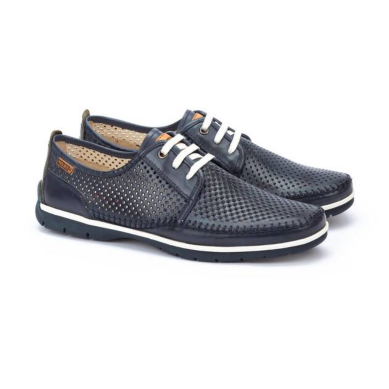

id: 3672, distance: 1.4780380725860596, metadata: {'filename': 'W4N-0527ST-MARFIL'}, document: None
data: Brand2/W4N-0527ST-MARFIL (4).jpg


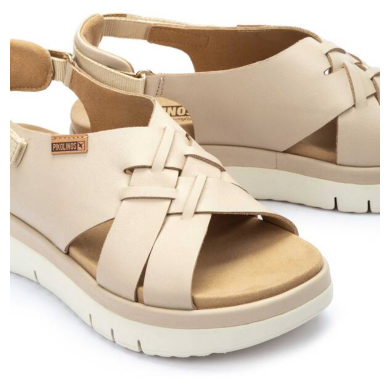

id: 584, distance: 1.4851024150848389, metadata: {'filename': '09Z-5511XL-ESPUMA'}, document: None
data: Brand2/09Z-5511XL-ESPUMA (1).jpg


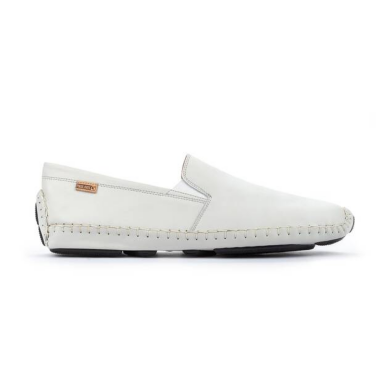

In [31]:
query_texts = ['black']

# Query vector db
query_results = multimodal_db.query(
    query_texts=query_texts,
    n_results=3,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
)

print_query_results(query_texts, query_results)

Results for query: Brand1/16002-318 (2).jpg
id: 3980, distance: 0.682511568069458, metadata: {'filename': 'W4Y-1992-NATA'}, document: None
data: Brand2/W4Y-1992-NATA (1).jpg


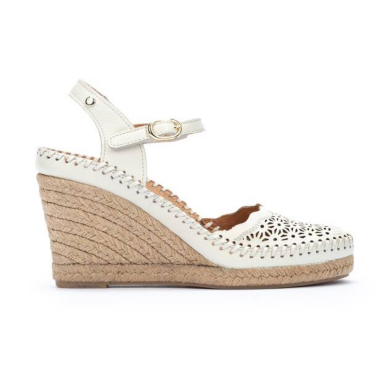

id: 3979, distance: 0.7057170867919922, metadata: {'filename': 'W4Y-1992-BRANDY'}, document: None
data: Brand2/W4Y-1992-BRANDY (4).jpg


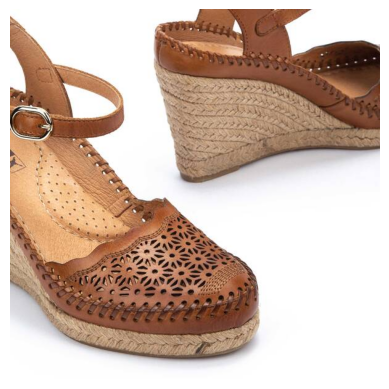

In [32]:
from PIL import Image
query_image = 'Brand1/16002-318 (2).jpg'
uri = query_image.split("/")[1]
code = uri.split("(")[0].replace(" ", "")
query_results = multimodal_db.query(
    query_uris=[query_image],
    n_results=2,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
    where={'filename': {'$ne': code}}
)
print_query_results([query_image], query_results)

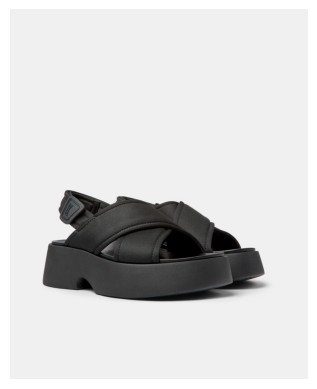

In [33]:
image_uri ="Brand1/K201610-001 (2).jpg"
image = Image.open(image_uri)
plt.imshow(image)
plt.axis("off")
plt.show()

Results for query: Brand1/K201610-001 (2).jpg
id: 1855, distance: 1.5214002132415771, metadata: {'filename': 'M2A-6252-HONEY'}, document: None
data: Brand2/M2A-6252-HONEY (4).jpg


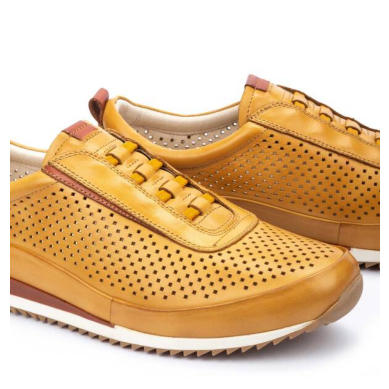

id: 3515, distance: 1.5248558521270752, metadata: {'filename': 'W3Z-1776C2-NATA'}, document: None
data: Brand2/W3Z-1776C2-NATA (4).jpg


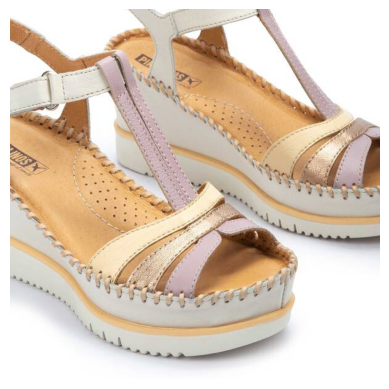

In [34]:
query_images = [image_uri]

query_results = multimodal_db.query(
    query_images=query_images,
    n_results=2,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
)
print_query_results(query_images, query_results)